In [4]:
import surprise

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('C:/datasetcasas/ratings.txt', sep=" ", names = ['id_usuario', 'id_filme', 'rating'])

In [7]:
dataset.head()

,id_usuario,id_filme,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0


In [8]:
filmes = len(dataset['id_filme'].unique())
usuarios = len(dataset['id_usuario'].unique())
amostras = dataset.shape[0]
print("total filmes:", filmes)
print("total usuarios:", usuarios)
print("total amostras:", amostras)

total filmes: 2071
total usuarios: 1508
total amostras: 35497


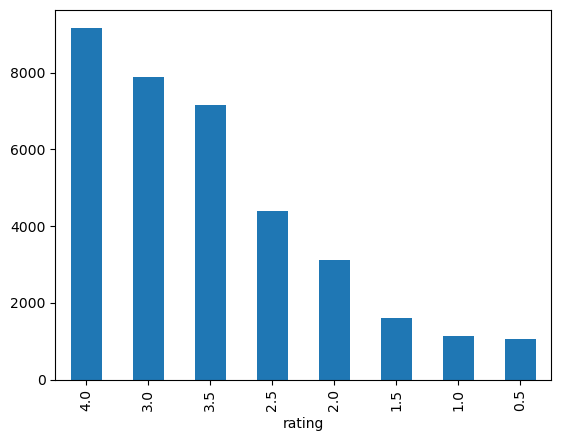

In [9]:
dataset['rating'].value_counts().plot(kind='bar')
plt.show()

In [10]:
reader = surprise.Reader(rating_scale = (0.5, 4.0))
dataset_surprise = surprise.Dataset.load_from_df(dataset, reader)

In [11]:
dataset_preenchido = dataset_surprise.build_full_trainset()
algoritimo = surprise.SVDpp(n_factors=20)
algoritimo.fit(dataset_preenchido)

In [12]:
dataset_missing = dataset_preenchido.build_anti_testset()
previsoes = algoritimo.test(dataset_missing)

In [13]:
previsoes[0]

Prediction(uid=1, iid=13, r_ui=3.0028030537791928, est=3.649049414798785, details={'was_impossible': False})

In [16]:
from collections import defaultdict

def obtem_top_n(previsoes, n=5):
    top_n = defaultdict(list)
    for usuario, filme, _, previsao, _ in previsoes:
        top_n[usuario].append((filme, previsao))
    for usuario, previsoes_usuario in top_n.items():
        previsoes_usuario.sort(key=lambda x: x[1], reverse=True)
        top_n[usuario] = previsoes_usuario[:n]
    return top_n

In [17]:
top_5 = obtem_top_n(previsoes, n=5)

In [18]:
top_5

defaultdict(list,
            {1: [(286, 4.0),
              (335, 3.9854824991508018),
              (805, 3.9805755382553314),
              (705, 3.9532135343597483),
              (318, 3.867982086212237)],
             2: [(286, 3.6442068702859927),
              (335, 3.5477135566571016),
              (805, 3.5381801003635305),
              (705, 3.516148369020977),
              (675, 3.4775716076617473)],
             3: [(286, 3.9680733715364305),
              (842, 3.8365818146582162),
              (845, 3.8340004022835608),
              (220, 3.819281968631411),
              (414, 3.815252220818727)],
             4: [(286, 3.469652010725201),
              (189, 3.274176225997131),
              (805, 3.263478951412841),
              (363, 3.255615647685075),
              (335, 3.2549493393119686)],
             5: [(675, 3.791942693369174),
              (805, 3.768748928696055),
              (335, 3.7590455975483144),
              (705, 3.7354455985564843),
    

In [19]:
for usuario, previsoes_usuario in top_5.items():
    print(usuario, [filme for (filme, _) in previsoes_usuario])

1 [286, 335, 805, 705, 318]
2 [286, 335, 805, 705, 675]
3 [286, 842, 845, 220, 414]
4 [286, 189, 805, 363, 335]
5 [675, 805, 335, 705, 286]
6 [286, 299, 335, 705, 805]
7 [286, 675, 318, 705, 335]
8 [286, 335, 805, 705, 675]
9 [705, 286, 318, 335, 689]
10 [286, 335, 805, 363, 307]
11 [286, 705, 805, 675, 318]
12 [286, 299, 335, 805, 525]
13 [286, 363, 675, 189, 181]
14 [805, 286, 335, 307, 689]
15 [286, 805, 335, 705, 675]
16 [286, 335, 805, 318, 705]
17 [286, 805, 705, 335, 689]
18 [286, 805, 335, 705, 689]
19 [286, 805, 335, 705, 299]
20 [286, 335, 675, 307, 805]
21 [43, 52, 68, 96, 144]
22 [52, 68, 126, 167, 189]
23 [286, 675, 335, 805, 705]
24 [286, 705, 299, 805, 318]
25 [286, 675, 335, 805, 189]
26 [286, 805, 705, 335, 675]
27 [286, 335, 805, 705, 675]
28 [286, 805, 335, 425, 689]
29 [335, 705, 525, 250, 446]
30 [286, 189, 675, 638, 297]
31 [286, 805, 335, 675, 307]
32 [286, 335, 805, 675, 299]
33 [805, 286, 675, 335, 400]
34 [286, 805, 675, 335, 363]
35 [286, 335, 805, 705, 675]
